### The goal of this code is to predict the closing stock price of Tesla and here artificial recurrent neural network called Long Short Term Memory (LSTM) is used.

# Long short-term memory

+ Long short-term memory (LSTM) networks are a special kind of recurrent neural networks that are capable of selectively remembering patterns for long duration of time. LSTM is used in field of deep learning
+ It is an ideal choice to model sequential data and hence used to learn complex dynamics of human activity. The long-term memory is called the cell state. Due to the recursive nature of the cells, previous information is stored within it.

For further information [click here](https://www.sciencedirect.com/topics/engineering/long-short-term-memory)

Keras info [click here](https://www.datacamp.com/community/tutorials/deep-learning-python?utm_campaignid=282657555&utm_adgroupid=1147890695096458&utm_device=c&utm_keyword=keras&utm_matchtype=e&utm_network=s&utm_adpostion=&utm_creative=&utm_targetid=kwd-71743615746804:loc-72&utm_loc_interest_ms=&utm_loc_physical_ms=120813&msclkid=24b0f584878814a4a5ae94b5cb7af1cc&utm_source=bing&utm_medium=cpc&utm_campaign=NEW%20Granular%20Topics%20(via%20DSA%20insights)%20%7C%20Tier%201%20BING&utm_term=keras&utm_content=community%2Ftutorials%2Fdeep-learning-python)

+ A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

## Deep learning

+ Deep learning is a machine learning technique that enables computers to acquire a skill that humans naturally have: to learn from examples. Deep learning is an important technology in driverless cars that enables them to recognize a stop sign or differentiate a pedestrian from a street lamp.

+ it is the key to voice control of consumer devices such as smartphones, tablets, televisions and speakerphones. Deep learning has been getting a lot of attention lately, and for good reason. It achieves results that were previously impossible.

For further information [click here](https://de.mathworks.com/discovery/deep-learning.html)

In [1]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow

In [4]:
# Importing the libraries

import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')  # generally it is used to plot as trend chart or similar to stock chart

In [5]:
# import the stock data

df = web.DataReader('TSLA', data_source = 'yahoo', start = '2012-01-01', end = '2020-12-17')

df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,5.900,5.530,5.788,5.616,4640500.0,5.616
2012-01-04,5.734,5.500,5.642,5.542,3150500.0,5.542
2012-01-05,5.586,5.370,5.552,5.424,5027500.0,5.424
2012-01-06,5.558,5.282,5.440,5.382,4931500.0,5.382
2012-01-09,5.498,5.224,5.400,5.450,4485000.0,5.450


In [6]:
# checking no. of rows and columns in dataset

df.shape

# from below output 2256 is no. of rows and 6 is no. of columns

(2256, 6)

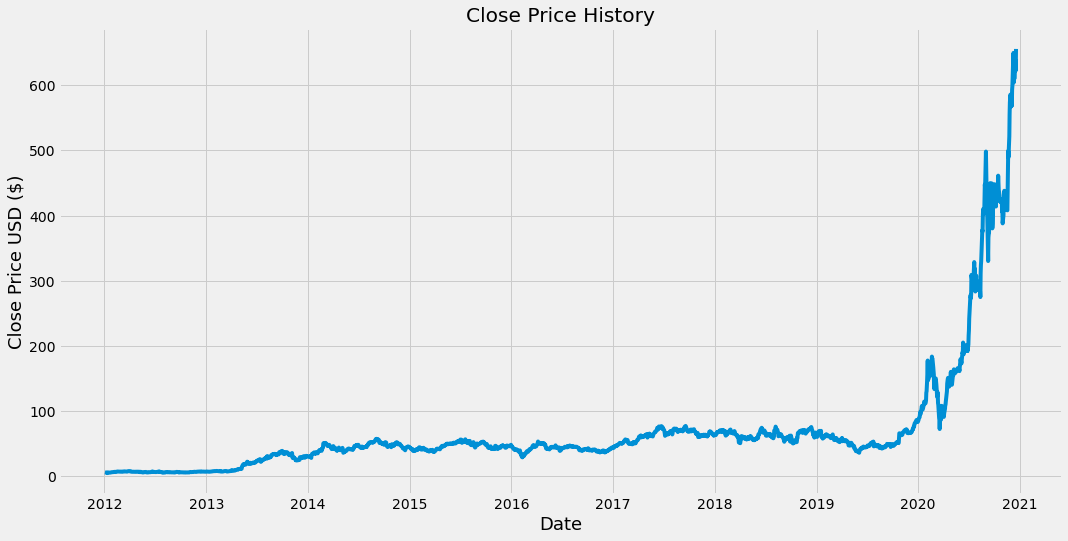

In [7]:
# visualizing the closing price history

plt.figure(figsize = (16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel ('Close Price USD ($)', fontsize = 18)
plt.show()

In [8]:
# Creating a new data frame with only single column (Close)

n_df = df.filter(['Close'])

# converting the dataframe to numpy array

d_f = n_df.values

# get the number of rows to train the LSTM model on
# here training the model by 80% hence .8 is used, ceil is used to round up the values

training_data_len = math.ceil(len(d_f)*.8)

training_data_len

1805

### Scaling

+ scaling is always advantageous to apply pre-processing and transformations. Scaling and normalization to the input data before before it is presented to a neural network.

For more info [click here](https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/)

MinMaxScaler data [click here](https://www.geeksforgeeks.org/standardscaler-minmaxscaler-and-robustscaler-techniques-ml/)

In [9]:
# Scale the data

scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(d_f)#here basically transform is used to compute the max and min values used for scaling. Then transform the data based on these two values.

scaled_data

array([[0.00162434],
       [0.00151073],
       [0.00132956],
       ...,
       [0.96522561],
       [0.94913578],
       [1.        ]])

### Creating the training datasets

In [10]:
# creating the training dataset

# Initially creating the scaled training dataset

train_data = scaled_data[0:training_data_len, :] #(:) is used for representing all columns

# Now splitting the data into x_train and y_train datasets

x_train = []   # x_train is independent variables or trainee features
y_train = []   # y_train is dependent variables or target variables


for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0]) #here appending past 60 values to x_train dataset
    y_train.append(train_data[i,0])
# here x_train contains values indexed from position 0 to position 59
# here y_train contains the 61st value which will be at position 60
    if i<=60:
        print(x_train)
        print(y_train)
        print() #for new line

[array([0.00162434, 0.00151073, 0.00132956, 0.00126508, 0.00136948,
       0.00148309, 0.0016704 , 0.00167654, 0.        , 0.00116989,
       0.00123437, 0.00121902, 0.00116989, 0.00122209, 0.00142168,
       0.00159056, 0.00188841, 0.00200816, 0.00208186, 0.00192833,
       0.00208493, 0.00229066, 0.00256701, 0.0027666 , 0.00270518,
       0.00280651, 0.0030061 , 0.00255165, 0.00267141, 0.00318727,
       0.0033193 , 0.00349739, 0.00373997, 0.00359565, 0.00350968,
       0.00360486, 0.00336536, 0.00332544, 0.00338378, 0.00326096,
       0.00356802, 0.00345441, 0.0033715 , 0.00316884, 0.00317191,
       0.00315656, 0.00366935, 0.00405931, 0.00408388, 0.00383823,
       0.00374918, 0.00384744, 0.00374304, 0.0037369 , 0.00379524,
       0.00356495, 0.00346669, 0.00448612, 0.00465193, 0.0046243 ])]
[0.004464628234879081]



In [11]:
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0]) #here appending past 60 values to x_train dataset
    y_train.append(train_data[i,0])
# here x_train contains values indexed from position 0 to position 59
# here y_train contains the 61st value which will be at position 60
    if i<=61:
        print(x_train)
        print(y_train)
        print() #for new line

[array([0.00162434, 0.00151073, 0.00132956, 0.00126508, 0.00136948,
       0.00148309, 0.0016704 , 0.00167654, 0.        , 0.00116989,
       0.00123437, 0.00121902, 0.00116989, 0.00122209, 0.00142168,
       0.00159056, 0.00188841, 0.00200816, 0.00208186, 0.00192833,
       0.00208493, 0.00229066, 0.00256701, 0.0027666 , 0.00270518,
       0.00280651, 0.0030061 , 0.00255165, 0.00267141, 0.00318727,
       0.0033193 , 0.00349739, 0.00373997, 0.00359565, 0.00350968,
       0.00360486, 0.00336536, 0.00332544, 0.00338378, 0.00326096,
       0.00356802, 0.00345441, 0.0033715 , 0.00316884, 0.00317191,
       0.00315656, 0.00366935, 0.00405931, 0.00408388, 0.00383823,
       0.00374918, 0.00384744, 0.00374304, 0.0037369 , 0.00379524,
       0.00356495, 0.00346669, 0.00448612, 0.00465193, 0.0046243 ]), array([0.00151073, 0.00132956, 0.00126508, 0.00136948, 0.00148309,
       0.0016704 , 0.00167654, 0.        , 0.00116989, 0.00123437,
       0.00121902, 0.00116989, 0.00122209, 0.00142168, 0.00

[array([0.00162434, 0.00151073, 0.00132956, 0.00126508, 0.00136948,
       0.00148309, 0.0016704 , 0.00167654, 0.        , 0.00116989,
       0.00123437, 0.00121902, 0.00116989, 0.00122209, 0.00142168,
       0.00159056, 0.00188841, 0.00200816, 0.00208186, 0.00192833,
       0.00208493, 0.00229066, 0.00256701, 0.0027666 , 0.00270518,
       0.00280651, 0.0030061 , 0.00255165, 0.00267141, 0.00318727,
       0.0033193 , 0.00349739, 0.00373997, 0.00359565, 0.00350968,
       0.00360486, 0.00336536, 0.00332544, 0.00338378, 0.00326096,
       0.00356802, 0.00345441, 0.0033715 , 0.00316884, 0.00317191,
       0.00315656, 0.00366935, 0.00405931, 0.00408388, 0.00383823,
       0.00374918, 0.00384744, 0.00374304, 0.0037369 , 0.00379524,
       0.00356495, 0.00346669, 0.00448612, 0.00465193, 0.0046243 ]), array([0.00151073, 0.00132956, 0.00126508, 0.00136948, 0.00148309,
       0.0016704 , 0.00167654, 0.        , 0.00116989, 0.00123437,
       0.00121902, 0.00116989, 0.00122209, 0.00142168, 0.00

In [12]:
# Converting the x_train, y_train datasets to numpy arrays. For training the LSTM model

x_train, y_train = np.array(x_train), np.array(y_train)

### Reshaping the data

+ why do reshape the data?

+ Generally, a LSTM network expects the input to be in 3-dimensional in the form of a number of samples, number of timesteps, and number of features

+ where as now x_train, y_train datasets are 2-dimensional for this just type x_train.shape --> (3504,60) where 1st is rows, 2 is columns

+ x_train = np.reshape(x_train, (number of samples(rows), number of timesteps(columns), number of features(closing price as 1))

+ for more accurate x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)

In [13]:
# reshaping the data

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(3490, 60, 1)

### Building the LSTM model

+ LSTM (no. of neurons (any number), return_sequences = True (it must be set to true for adding another layers below it), input_shape = (no.of timesteps (60), no.of features (1) ))

+ after that for another LSTM layers -> LSTM (no. of neurons (any number), return_sequence = False ( as we are not adding any layers)) - in this condition no need of input_shape

+ now adding the dense layer

+ model.add(Dense(no. of neurons (25))) - where this is just regularly densely connected neural network layer with 25 neurons

In [14]:
# building the LSTM model

model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

### Compile the model

+ for this just type model.compile(optimizer = 'adam', loss = 'mean_squared_error')

+ here optimizer is used to improve on the 'loss function' and loss function is used to measure how well the model did on training.

+ Adam is an adaptive learning rate optimization algorithm that’s been designed specifically for training deep neural networks.

for more info on 'Adam' [click here](https://towardsdatascience.com/adam-latest-trends-in-deep-learning-optimization-6be9a291375c)

In [15]:
# compile the model

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Training the model

+ here fit is another name for 'train'

+ here batch_size is the total number of training examples present in a single batch and in this case it is equal to 1

+ here epochs is no. of iterations when an entire dataset is passed forward and backward through a neural network and in this it is equal to 1

In [16]:
# training the model

model.fit(x_train, y_train, batch_size = 1, epochs = 1)

3490/3490 [==============================] - 78s 21ms/step - loss: 4.1612e-05


### Creating the testing datasets

In [17]:
# creating the testing dataset
# creating a new array containing scaled values from index 3490 to 3550

test_data = scaled_data[training_data_len - 60: , :]

# creating the datasets x_test and y_test

x_test = []

y_test = d_f[training_data_len: , :] # here y_test has all values which are going to predict and this are actual test values

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0]) # here past 60 values are appending to x_test
    

In [18]:
# converting data into numpy array to use in LSTM model

x_test = np.array(x_test)

In [19]:
# reshaping the data

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [20]:
# Get the models predicted price values

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions) #here making predictions and y_test with similar rows and columns and here gerenally unscaling the values

### Evaluating the Model

+ This is done by getting the root mean squared error (RMSE)

+ RMSE is good measure of how accurate the model predicts the response and it's standard deviation of the residuals and the lower values of RMSE indicate a better fit and usually there are another model to predict like:

+ [moving average](https://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp)
+ [Linear regression](https://en.wikipedia.org/wiki/Linear_regression)
+ [K-nearest neighbours](https://heartbeat.fritz.ai/guide-to-implementing-k-nearest-neighbors-in-your-machine-learning-model-3b8420f16d93)
+ [ARIMA](https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/)
+ [Prophet](http://intelligentonlinetools.com/blog/2017/12/26/prediction-data-stock-price-prophet-report/)

For info on [RMSE](https://en.wikipedia.org/wiki/Root-mean-square_deviation)

In [21]:
# Caculating the root mean squared error (RMSE)

rmse = np.sqrt(np.mean(((predictions - y_test)**2)))
rmse

27.599192196162758

In [22]:
# another type of statement to calculate the RMSE

rmse = np.sqrt(((predictions - y_test) ** 2).mean())
rmse

27.599192196162758

<ipython-input-23-bb20c1301109>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions #here defining new column


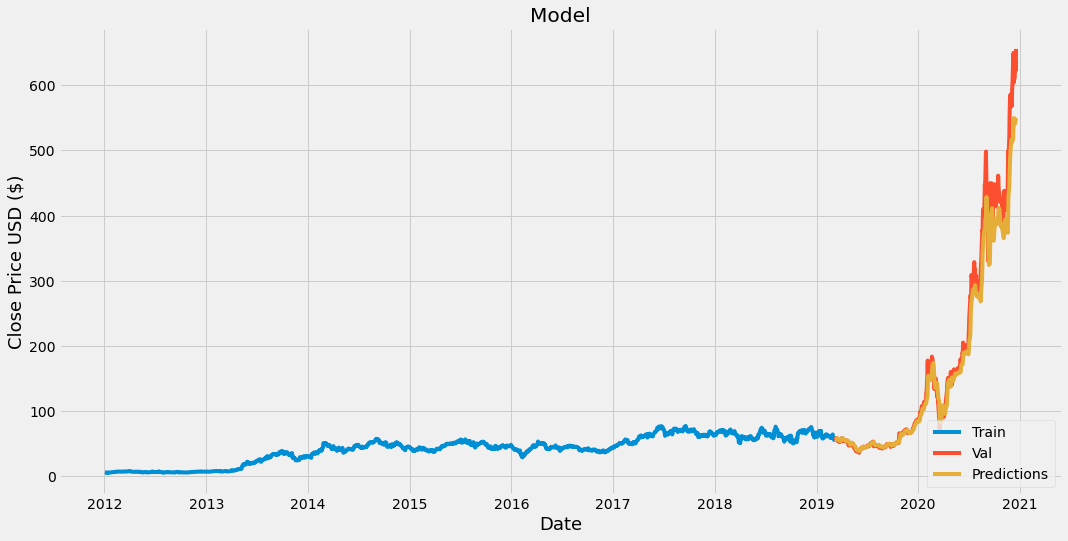

In [23]:
# plot the data

train = n_df[:training_data_len]
valid = n_df[training_data_len:]
valid['Predictions'] = predictions #here defining new column

# visualize the data

plt.figure(figsize = (16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

In [24]:
# Show the valid and predicted prices

valid

,Close,Predictions
Date,,
2019-03-08,56.827999,56.078640
2019-03-11,58.183998,56.117870
2019-03-12,56.672001,56.968945
2019-03-13,57.792000,57.423355
2019-03-14,57.992001,57.983330
...,...,...
2020-12-11,609.989990,547.022766
2020-12-14,639.830017,541.401611
2020-12-15,633.250000,544.797607


In [25]:
# getting the quote

tsla_quote = web.DataReader('TSLA', data_source = 'yahoo', start = '2012-01-01', end = '2020-12-31')

#creating a new data frame

new_df = tsla_quote.filter(['Close'])

# to get the last 60 day closing price values and convert the dataframe to an array

last_60_days = new_df[-60:].values

# scaling the data to be values between 0 and 1

last_60_days_scaled = scaler.transform(last_60_days)

# Creating an empty list

X_test = []

# Append the past 60 days

X_test.append(last_60_days_scaled)

# Converting the X_test data set to a numpy array

X_test = np.array(X_test)

# Reshaping the data

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# getting the predicted scaled price

pred_price = model.predict(X_test)

# undo the scaling

pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[595.5859]]


In [26]:
# getting the quote

tsla_quote2 = web.DataReader('TSLA', data_source = 'yahoo', start = '2020-12-18', end = '2020-12-18')
print(tsla_quote2['Close'])

Date
2020-12-18    695
Name: Close, dtype: int64
